In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import grale.lenses as lenses
import grale.plotutil as plotutil
import grale.cosmology as cosmology
from grale.feedback import setDefaultFeedback
from grale.constants import *

setDefaultFeedback("notebook")
V = lambda x,y: np.array([x,y],dtype=np.double)

In [2]:
cosm = cosmology.Cosmology(0.7,0.3,0,0.7)

In [3]:
z_d = 0.5
z_s = 2.0
Dd = cosm.getAngularDiameterDistance(z_d)
Dds = cosm.getAngularDiameterDistance(z_d, z_s)
Ds = cosm.getAngularDiameterDistance(z_s)

Text(value='')

FloatProgress(value=0.0)

Text(value='')

FloatProgress(value=0.0)

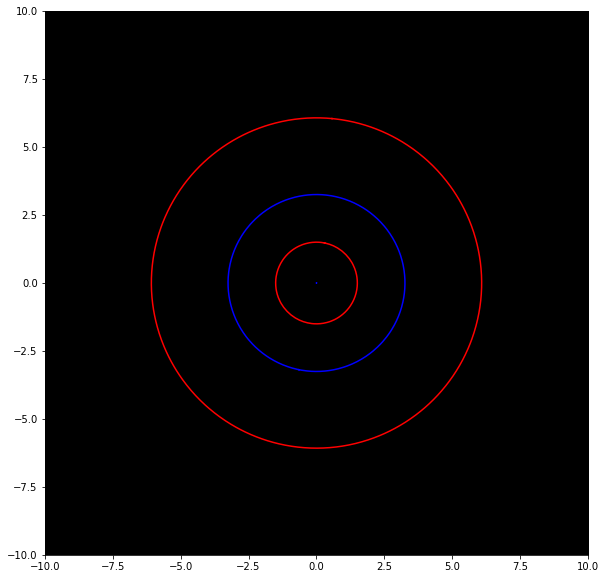

In [4]:
baseLens = lenses.NSISLens(Dd, {"velocityDispersion": 600000, "coreRadius": 0.5*ANGLE_ARCSEC})
lensInfo = {
    "lens": baseLens,
    "bottomleft": V(-10,-10)*ANGLE_ARCSEC,
    "topright": V(10,10)*ANGLE_ARCSEC,
    "Ds": Ds,
    "Dds": Dds,
}
    
plotutil.plotDensityInteractive(lensInfo, angularUnit=ANGLE_ARCSEC);
plt.figure(figsize=(10,10))
plotutil.plotImagePlane(lensInfo, angularUnit=ANGLE_ARCSEC);

In [13]:
lines = lensInfo["imageplane"].getCriticalLines()
rs = [ sum(pt**2)**0.5 for pt in lines[0] ]
print(np.max(rs)/ANGLE_ARCSEC, np.min(rs)/ANGLE_ARCSEC)
r_einstein = 0.5*(np.max(rs) + np.min(rs))/ANGLE_ARCSEC
print("r_einstein =", r_einstein, "arcsec")

6.0764119906085625 6.076258695426329
r_einstein = 6.076335343017446


In [12]:
critDens = lensInfo["lens"].getCriticalDensity(Ds, Dds)
critDens

4.341745756808096

In [10]:
_lambda = 0.7
sheet = lenses.MassSheetLens(Dd, { "density": critDens })
msd = lenses.CompositeLens(Dd, [
    { "factor": _lambda, "x": 0, "y": 0, "angle": 0, "lens": baseLens },
    { "factor": (1-_lambda), "x": 0, "y": 0, "angle": 0, "lens": sheet }
])

Text(value='')

FloatProgress(value=0.0)

Text(value='')

Text(value='')

FloatProgress(value=0.0)

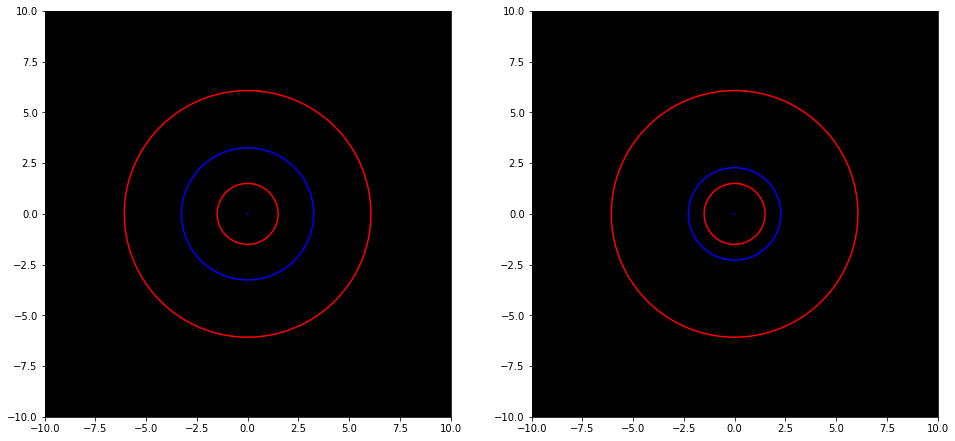

In [11]:
msdLensInfo = {
    "lens": msd,
    "bottomleft": V(-10,-10)*ANGLE_ARCSEC,
    "topright": V(10,10)*ANGLE_ARCSEC,
    "Ds": Ds,
    "Dds": Dds,
}
    
plotutil.plotDensityInteractive(msdLensInfo, angularUnit=ANGLE_ARCSEC);
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plotutil.plotImagePlane(lensInfo, angularUnit=ANGLE_ARCSEC);
plt.subplot(1,2,2)
plotutil.plotImagePlane(msdLensInfo, angularUnit=ANGLE_ARCSEC);

In [15]:
lines = msdLensInfo["imageplane"].getCriticalLines()
rs = [ sum(pt**2)**0.5 for pt in lines[0] ]
print(np.max(rs)/ANGLE_ARCSEC, np.min(rs)/ANGLE_ARCSEC)
r_einstein_msd = 0.5*(np.max(rs) + np.min(rs))/ANGLE_ARCSEC
print("r_einstein_msd =", r_einstein_msd, "arcsec")

6.0764119906085625 6.076258695426329
r_einstein_msd = 6.076335343017446 arcsec


Text(value='')

Text(value='')

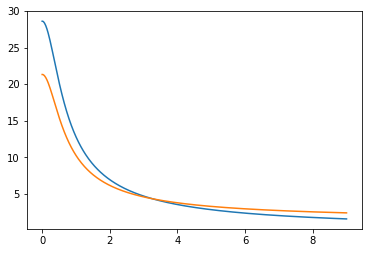

In [19]:
plotutil.plotAverageDensityProfile(lensInfo, thetaMax = 9*ANGLE_ARCSEC, angularUnit=ANGLE_ARCSEC);
plotutil.plotAverageDensityProfile(msdLensInfo, thetaMax = 9*ANGLE_ARCSEC, angularUnit=ANGLE_ARCSEC);